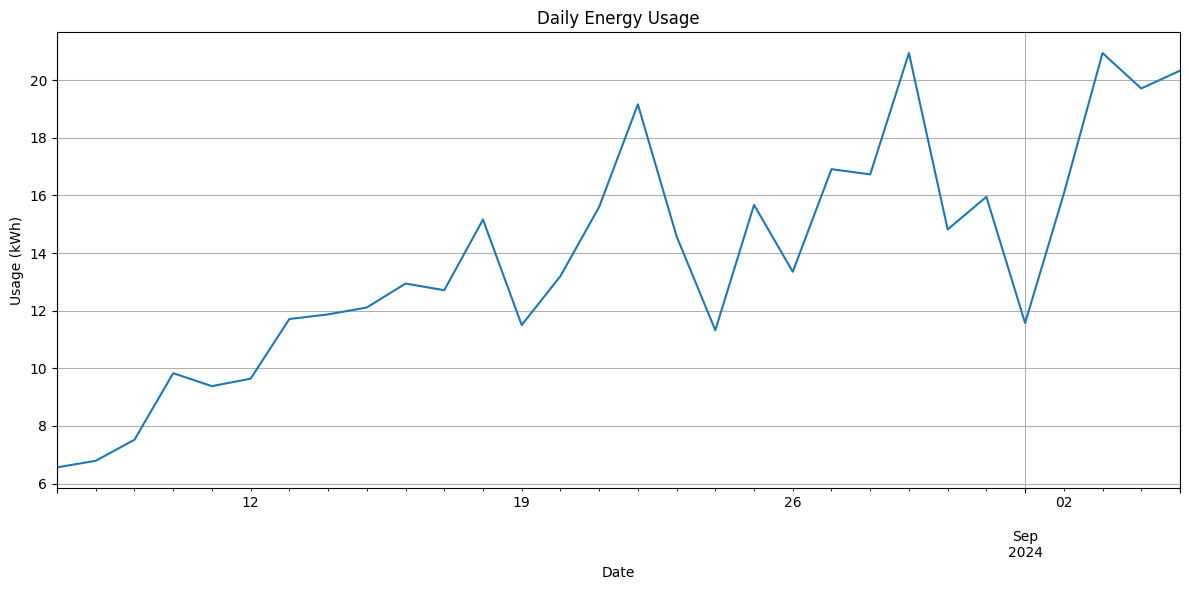

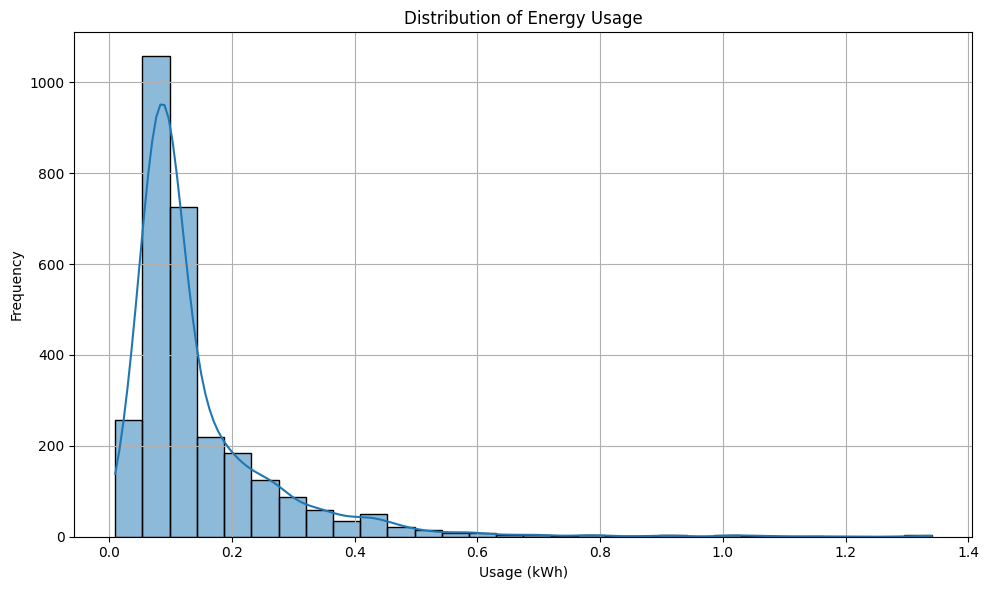

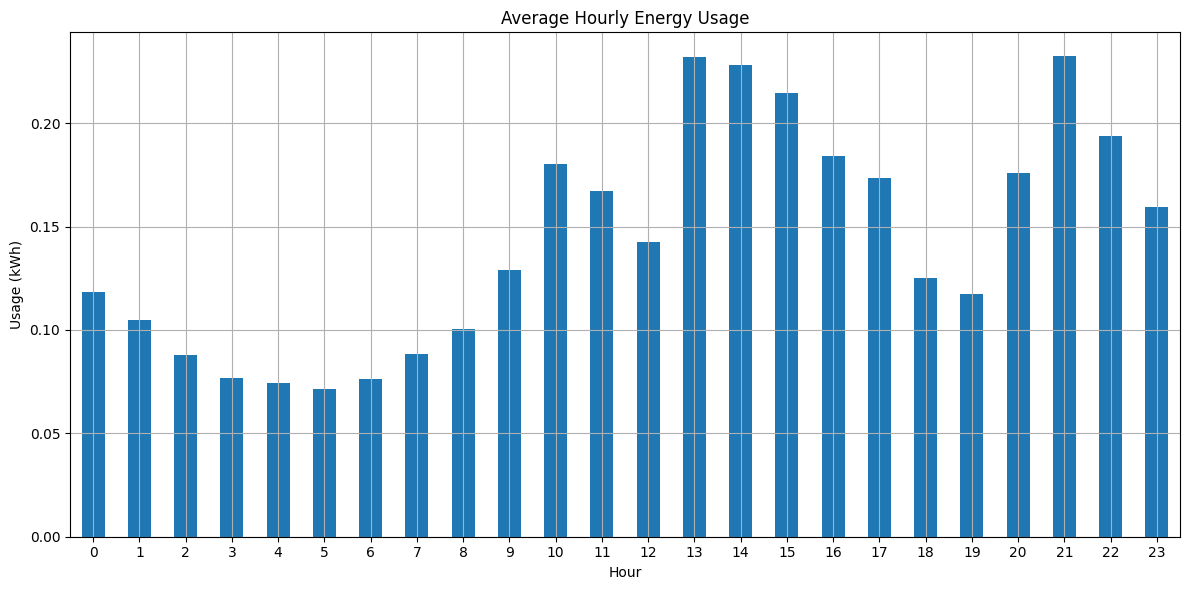

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'S:/SJSU/DATA_230/energy_consumption_project/data/raw/energy_consumption.csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns
df.drop(columns=["NOTES"], inplace=True)

# Convert DATE, START TIME, and END TIME to datetime
df["DATE"] = pd.to_datetime(df["DATE"])
df["START TIME"] = pd.to_datetime(df["START TIME"], format='%H:%M').dt.time
df["END TIME"] = pd.to_datetime(df["END TIME"], format='%H:%M').dt.time

# Add a datetime column
df["DATETIME"] = pd.to_datetime(df["DATE"].astype(str) + " " + df["START TIME"].astype(str))

# Summary statistics
usage_summary = df["USAGE (kWh)"].describe()

# Group by date
daily_usage = df.groupby("DATE")["USAGE (kWh)"].sum()

# Plot daily usage
plt.figure(figsize=(12, 6))
daily_usage.plot(kind="line", title="Daily Energy Usage", xlabel="Date", ylabel="Usage (kWh)")
plt.grid()
plt.tight_layout()
plt.show()

# Distribution of usage
plt.figure(figsize=(10, 6))
sns.histplot(df["USAGE (kWh)"], kde=True, bins=30)
plt.title("Distribution of Energy Usage")
plt.xlabel("Usage (kWh)")
plt.ylabel("Frequency")
plt.grid()
plt.tight_layout()
plt.show()

# Hourly usage
df["HOUR"] = pd.to_datetime(df["DATETIME"]).dt.hour
hourly_usage = df.groupby("HOUR")["USAGE (kWh)"].mean()

# Plot hourly usage
plt.figure(figsize=(12, 6))
hourly_usage.plot(kind="bar", title="Average Hourly Energy Usage", xlabel="Hour", ylabel="Usage (kWh)")
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()

# Save processed data
df.to_csv('S:/SJSU/DATA_230/energy_consumption_project/data/raw/processed_energy_consumption.csv', index=False)


In [4]:
data_info = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "Null Values": df.isnull().sum().to_dict(),
    "Data Types": df.dtypes.to_dict(),
    "First Few Rows": df.head().to_dict()
}


In [6]:
df.shape

(2880, 8)

In [7]:
df.columns.tolist()

['TYPE',
 'DATE',
 'START TIME',
 'END TIME',
 'USAGE (kWh)',
 'COST',
 'DATETIME',
 'HOUR']

In [8]:
df.isnull().sum().to_dict()

{'TYPE': 0,
 'DATE': 0,
 'START TIME': 0,
 'END TIME': 0,
 'USAGE (kWh)': 0,
 'COST': 0,
 'DATETIME': 0,
 'HOUR': 0}

In [10]:
df.dtypes.to_dict()

{'TYPE': dtype('O'),
 'DATE': dtype('<M8[ns]'),
 'START TIME': dtype('O'),
 'END TIME': dtype('O'),
 'USAGE (kWh)': dtype('float64'),
 'COST': dtype('O'),
 'DATETIME': dtype('<M8[ns]'),
 'HOUR': dtype('int32')}

In [11]:
df.head().to_dict()

{'TYPE': {0: 'Electric usage',
  1: 'Electric usage',
  2: 'Electric usage',
  3: 'Electric usage',
  4: 'Electric usage'},
 'DATE': {0: Timestamp('2024-08-07 00:00:00'),
  1: Timestamp('2024-08-07 00:00:00'),
  2: Timestamp('2024-08-07 00:00:00'),
  3: Timestamp('2024-08-07 00:00:00'),
  4: Timestamp('2024-08-07 00:00:00')},
 'START TIME': {0: datetime.time(0, 0),
  1: datetime.time(0, 15),
  2: datetime.time(0, 30),
  3: datetime.time(0, 45),
  4: datetime.time(1, 0)},
 'END TIME': {0: datetime.time(0, 14),
  1: datetime.time(0, 29),
  2: datetime.time(0, 44),
  3: datetime.time(0, 59),
  4: datetime.time(1, 14)},
 'USAGE (kWh)': {0: 0.04, 1: 0.04, 2: 0.04, 3: 0.02, 4: 0.02},
 'COST': {0: '$0.00', 1: '$0.00', 2: '$0.00', 3: '$0.00', 4: '$0.00'},
 'DATETIME': {0: Timestamp('2024-08-07 00:00:00'),
  1: Timestamp('2024-08-07 00:15:00'),
  2: Timestamp('2024-08-07 00:30:00'),
  3: Timestamp('2024-08-07 00:45:00'),
  4: Timestamp('2024-08-07 01:00:00')},
 'HOUR': {0: 0, 1: 0, 2: 0, 3: 0, 